<a href="https://colab.research.google.com/github/wlcosta/es235_pdi/blob/master/5_filtragem_pt2/Filtragem_(parte_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 5 - Filtragem Espacial (parte 2)

### Bilateral filter

Vamos importar as bibliotecas necessárias:

In [1]:
%matplotlib inline
import cv2 # OpenCV
import matplotlib.pyplot as plt # Matplotlib
import numpy as np # Numpy
from scipy import ndimage
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/lenna.jpg

--2021-06-02 21:54:02--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/lenna.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/jpeg]
Saving to: ‘lenna.jpg’

lenna.jpg           100%[===================>] 462.73K  --.-KB/s    in 0.04s   

2021-06-02 21:54:02 (12.0 MB/s) - ‘lenna.jpg’ saved [473831/473831]



E agora, vamos carregar a imagem da Lenna:

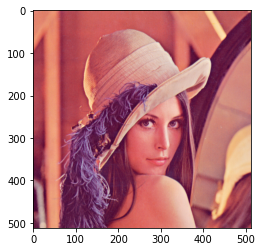

In [2]:
img = plt.imread('lenna.jpg')
plt.imshow(img)

Vamos usar o OpenCV para aplicar a filtragem bilateral. A biblioteca já possui um método implementado, o que facilita o processo. Usaremos o método [cv2.bilateralFilter()](https://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed).

Esse método recebe alguns argumentos que podem ser tunados para cada situação:

- A imagem de entrada;
- **d**: diâmetro da vizinhança;
- **sigmaColor**: controla a distância das cores que serão misturadas;
- **sigmaSpace**: a influência dos pixels pela distância.

Vamos definir como padrão os seguintes valores: d=9, sigmaColor=sigmaSpace=75.

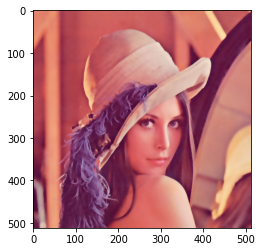

In [3]:
img_borrada = None
plt.imshow(img_borrada)

A princípio, não conseguimos notar tanta diferença. Vamos brincar com os valores e ver o resultado.

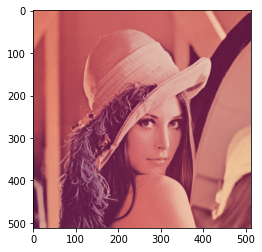

In [6]:
d = -15 #@param {type:"slider", min:-15, max:45, step:1}
sigmaColor = 66 #@param {type:"slider", min:50, max:150, step:1}
sigmaSpace = 112 #@param {type:"slider", min:50, max:150, step:1}

img_borrada = cv2.bilateralFilter(img,d=d,sigmaColor=sigmaColor,sigmaSpace=sigmaSpace)
plt.imshow(img_borrada)

Agora já conseguimos ver melhor o borrão.

### Box filter

Podemos usar o método [cv2.boxFilter()](https://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#gad533230ebf2d42509547d514f7d3fbc3) pra implementar o filtro box.

Esse método recebe alguns argumentos que podem ser tunados para cada situação:

- A imagem de entrada;
- A profundidade da imagem de saída (usamos -1 para o mesmo da entrada);
- O tamanho do kernel para borramento como uma tupla (k, k).

Preencha abaixo a célula de acordo com a chamada do método.

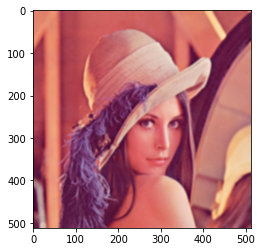

In [10]:
img_box = None
plt.imshow(img_box)

### Imagens integrais

Novamente, o OpenCV já vem com um método pronto pra realizar o cálculo de uma imagem integral. O método [cv2.integral()](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#integral) nos retorna a imagem integral de uma imagem dada. Vamos calcular a imagem integral da nossa imagem de testes:

In [11]:
soma = np.zeros((512+1,512+1),dtype='uint8')  
integral = cv2.integral(img,soma,-1)[1:,1:]
print(integral.shape)

(512, 512, 3)


### Pirâmides de imagens

Podemos usar os métodos [cv2.pyrDown()](https://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#gaf9bba239dfca11654cb7f50f889fc2ff) e [cv2.pyrUp()](https://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#gada75b59bdaaca411ed6fee10085eb784) para trabalhar com as pirâmides. Vamos fazer um exemplo:

(256, 256, 3)


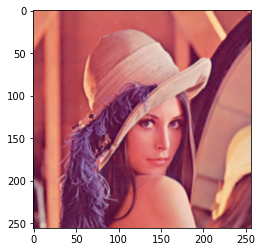

In [12]:
img_pyrdown = cv2.pyrDown(img)
plt.imshow(img_pyrdown)
print(img_pyrdown.shape)

(512, 512, 3)


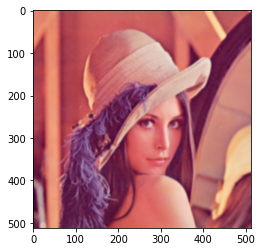

In [13]:
img_pyrup = None #use como entrada img_pyrdown
plt.imshow(img_pyrup)
print(img_pyrup.shape)

Será que a imagem original é igual a imagem acima?

In [14]:
(img == img_pyrup).all()

False

Shape de entrada:  (512, 512, 3)
Shape de saída:  (2048, 2048, 3)


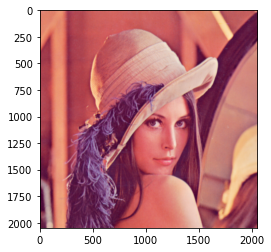

In [21]:
up = 0 #@param {type:"slider", min:0, max:10, step:1}
down = 0 #@param {type:"slider", min:0, max:10, step:1}
doPyrUp = True #@param {type:"boolean"}
doPyrDown = False #@param {type:"boolean"}
def pyr(down, up):
    img_pyr = img.copy()
    if doPyrDown:
      for i in range(down):
          img_pyr = cv2.pyrDown(img_pyr)
    if doPyrUp:
      for i in range(up):
          img_pyr = cv2.pyrUp(img_pyr)
    
    plt.imshow(img_pyr)
    print("Shape de entrada: ", img.shape)
    print("Shape de saída: ", img_pyr.shape)

pyr(down, up)